In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torchvision import datasets,transforms
from torch.utils.data import DataLoader,Dataset
from torchvision.utils import make_grid


import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x = torch.linspace(0,799,steps = 800)
y = torch.sin(x*2*3.1416/40)
y.shape,x.shape

(torch.Size([800]), torch.Size([800]))

In [ ]:
x.min(),x.max(),y.max(),y.min()

(tensor(0.), tensor(799.), tensor(1.), tensor(-1.))

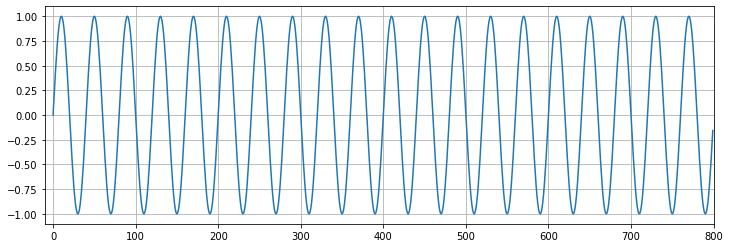

In [ ]:
plt.figure(figsize = (12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(y.numpy())
plt.show()

In [ ]:
test_size = 40

train_set = y[:-test_size]
test_set = y[-test_size:]

In [ ]:
train_set.shape, test_set.shape

(torch.Size([760]), torch.Size([40]))

In [ ]:
def input_data(seq, ws):

    out = []
    L = len(seq)

    for i in range(L - ws):

        window = seq[i : i + ws]
        
        label = seq[i+ws : i+ws+1]

        out.append((window, label))

    return out

In [ ]:
input_data(seq = [1,2,3,4,5], ws = 3)

[([1, 2, 3], [4]), ([2, 3, 4], [5])]

In [ ]:
window_size = 40

train_data = input_data(seq = train_set,ws = window_size)

train_data[0][0].shape, train_data[0][1].shape

(torch.Size([40]), torch.Size([1]))

In [ ]:
# 0 - 799 --- > 800
# 800 - 40 ---> 760
# 760 - 40 ---> 720

In [ ]:
class LSTM(nn.Module):

    def __init__(self, input_size = 1, hidden_size = 50, out_size = 1):

        super().__init__()

        self.hidden_size = hidden_size

        self.lstm = nn.LSTM(input_size , hidden_size)

        self.linear = nn.Linear(hidden_size , out_size)

        self.hidden = (torch.zeros(1,1,hidden_size),
                       torch.zeros(1,1,hidden_size))
        
    def forward(self,seq):

        lstm_out , self.hidden = self.lstm(seq.view(len(seq),1,-1), self.hidden)

        pred = self.linear(lstm_out.view(len(seq),-1))

        return pred[-1]

In [ ]:
train_set.shape,train_set.view(len(train_set),1,-1).shape,train_set.view(len(train_set), -1).shape

(torch.Size([760]), torch.Size([760, 1, 1]), torch.Size([760, 1]))

In [ ]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [ ]:
test = torch.linspace(1,4, 4)
test = test.view(len(test), 1, -1)
test.shape

torch.Size([4, 1, 1])

In [ ]:
model(test)

tensor([-0.1684], grad_fn=<SelectBackward0>)

In [ ]:
def count_parameters(model):

    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f"{item:>6}")

    print(f"_______\n{sum(params):>6}")

count_parameters(model)

   200
 10000
   200
   200
    50
     1
_______
 10651


In [ ]:
for i,(seq,train) in enumerate(train_data):
    print(seq.shape, train.shape)
    if i ==3:
        break

torch.Size([40]) torch.Size([1])
torch.Size([40]) torch.Size([1])
torch.Size([40]) torch.Size([1])
torch.Size([40]) torch.Size([1])


In [ ]:
# Train_set,test_set ile train_data farklı !!!

len(train_data),len(train_set)

(720, 760)

In [ ]:
model.hidden_size,window_size

(50, 40)

Epoch :  1, Loss : 0.06506767
Train Set Preds Shape :  (40,)
Append Preds Shape :  (80,)

Performance On Test Range : 0.5650987029075623


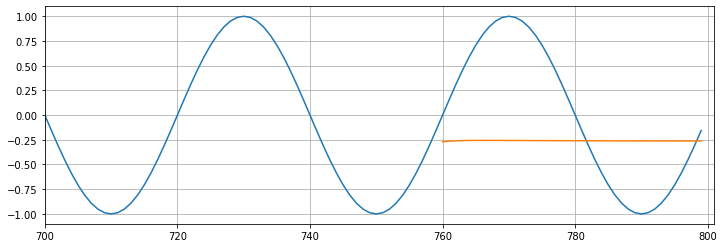

Epoch :  2, Loss : 0.04198048
Train Set Preds Shape :  (40,)
Append Preds Shape :  (80,)

Performance On Test Range : 0.5199716687202454


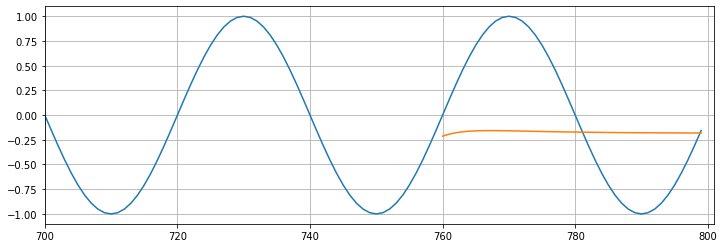

Epoch :  3, Loss : 0.01784276
Train Set Preds Shape :  (40,)
Append Preds Shape :  (80,)

Performance On Test Range : 0.42209967970848083


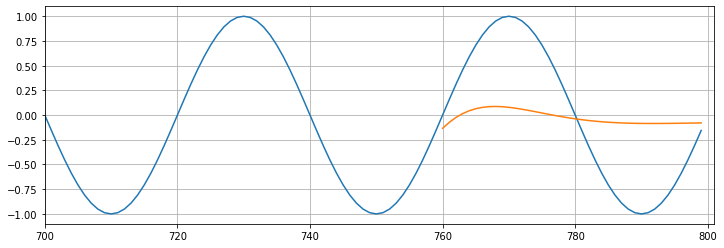

Epoch :  4, Loss : 0.00288710
Train Set Preds Shape :  (40,)
Append Preds Shape :  (80,)

Performance On Test Range : 0.16624125838279724


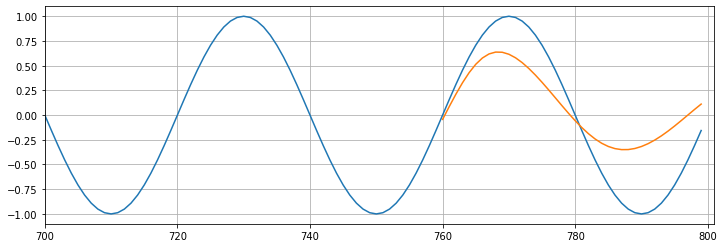

Epoch :  5, Loss : 0.00032008
Train Set Preds Shape :  (40,)
Append Preds Shape :  (80,)

Performance On Test Range : 0.030554424971342087


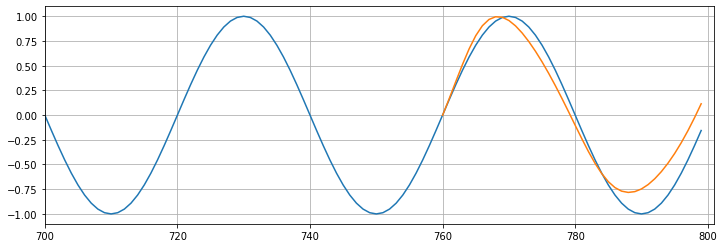

Epoch :  6, Loss : 0.00012969
Train Set Preds Shape :  (40,)
Append Preds Shape :  (80,)

Performance On Test Range : 0.014990185387432575


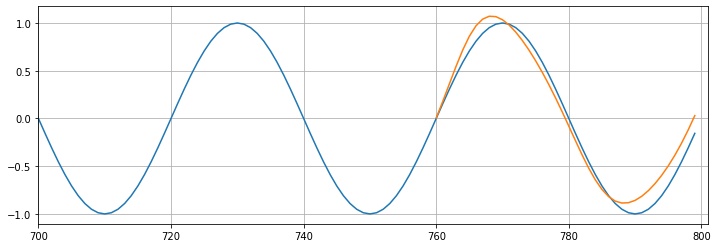

Epoch :  7, Loss : 0.00012007
Train Set Preds Shape :  (40,)
Append Preds Shape :  (80,)

Performance On Test Range : 0.01185668632388115


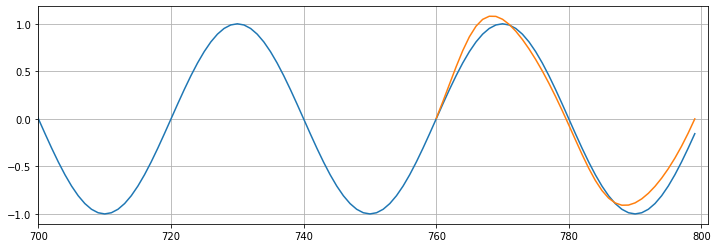

Epoch :  8, Loss : 0.00012656
Train Set Preds Shape :  (40,)
Append Preds Shape :  (80,)

Performance On Test Range : 0.010163827799260616


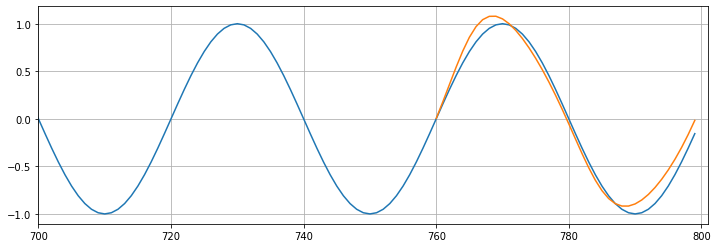

Epoch :  9, Loss : 0.00013195
Train Set Preds Shape :  (40,)
Append Preds Shape :  (80,)

Performance On Test Range : 0.008897590450942516


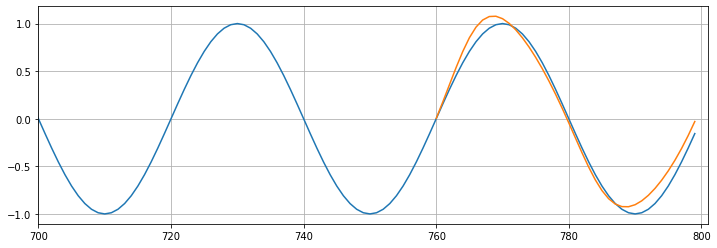

Epoch : 10, Loss : 0.00013450
Train Set Preds Shape :  (40,)
Append Preds Shape :  (80,)

Performance On Test Range : 0.007882237434387207


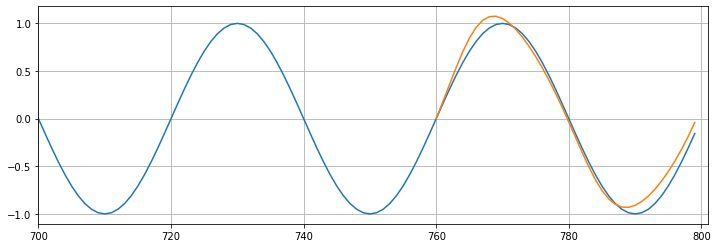

In [ ]:
epochs = 10
future = 40

for i in range(epochs):

    # Burda model eğitiliyor !!!
    # Train_data bu unutma !!!

    for seq, y_train in train_data:

        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)

        loss =criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    print(f"Epoch : {i+1:2}, Loss : {loss.item():10.8f}")

    # Train_set ile train_data dikkat et !! Karıştırma !!
    ###
    # Bu son preds yani şöyle normalde bizim train_set yani 760 değere sahip bir değer
    # Biz burdan son 40 değerini alıyoruz yani preds değerini shape = 40 oluyor train_set olarak 720 değer geride kalıyor
    # Bizim bu sahip olmuş olduğumuz 40 değerin üstüne 40 future daha ekliyoruz ve 80 preds sahip oluyoruz 
    # Burda sahip olmuş olduğumuz 80 değerin son 40 tahmin değerinden gelme yani model den gelme !!!
    # 720 + 80 = 800 oluyor

    
    preds = train_set[-window_size : ].tolist()
    print()
    print("Train Set Preds Shape : ", np.array(preds).shape)

    for f in range(future):
        
        # 40 değer var train'dan gelme
        # Tabi üstüne ekleye ekleye gidicek öyle alıcaz !!!
        seq = torch.FloatTensor(preds[-window_size:])

        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size),
                            torch.zeros(1,1,model.hidden_size))
            
            preds.append(model(seq).item())

    print("Append Preds Shape : ", np.array(preds).shape)

    loss = criterion(torch.tensor(preds[-window_size:]), y[760:])
    print()
    print(f"Performance On Test Range : {loss}")

    plt.figure(figsize = (12,4))
    plt.xlim(700,801)
    plt.grid(True)
    plt.plot(y.numpy())
    plt.plot(range(760,800), preds[window_size:])
    plt.show()

# Forecast Into An Unknown Future

In [ ]:
epochs = 10
window_size = 40
future = 40 

all_data = input_data(y,window_size)
len(all_data)

760

In [ ]:
for i,(seq,train) in enumerate(all_data):
    print(seq.shape, train.shape)
    if i == 3 :
        break

torch.Size([40]) torch.Size([1])
torch.Size([40]) torch.Size([1])
torch.Size([40]) torch.Size([1])
torch.Size([40]) torch.Size([1])


In [ ]:
import time
start_time = time.time()

for i in range(epochs):

    for seq,y_train in all_data:

        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    print(f"Epoch : {i+1:2}, Loss : {loss.item():10.8f}")

print(f"\nDuration : {time.time() - start_time:.0f} seconds")

Epoch :  1, Loss : 0.00013449
Epoch :  2, Loss : 0.00013247
Epoch :  3, Loss : 0.00012901
Epoch :  4, Loss : 0.00012459
Epoch :  5, Loss : 0.00011959
Epoch :  6, Loss : 0.00011427
Epoch :  7, Loss : 0.00010883
Epoch :  8, Loss : 0.00010341
Epoch :  9, Loss : 0.00009811
Epoch : 10, Loss : 0.00009301

Duration : 55 seconds


In [ ]:
preds = y[-window_size:].tolist()

for i in range(future):

    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        preds.append(model(seq).item())

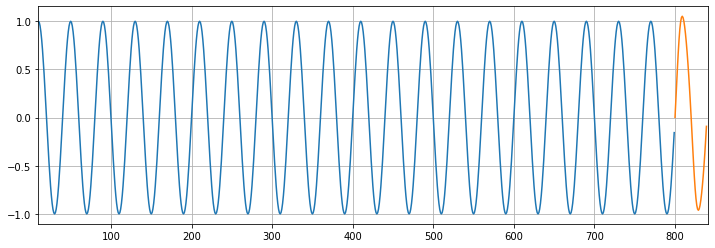

In [ ]:
plt.figure(figsize = (12,4))
plt.xlim(10,841)
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(800,800+future), preds[window_size:])
plt.show()

---

# RNN On A Time Series

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/PyTorch/Data/TimeSeriesData/Alcohol_Sales.csv"
df = pd.read_csv(path, parse_dates = True, index_col = 0)
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [ ]:
df.isnull().sum()

S4248SM144NCEN    0
dtype: int64

In [ ]:
df.columns

Index(['S4248SM144NCEN'], dtype='object')

In [ ]:
print("Before : ", len(df))
df.dropna(inplace = True)
print("After : ", len(df))

Before :  325
After :  325


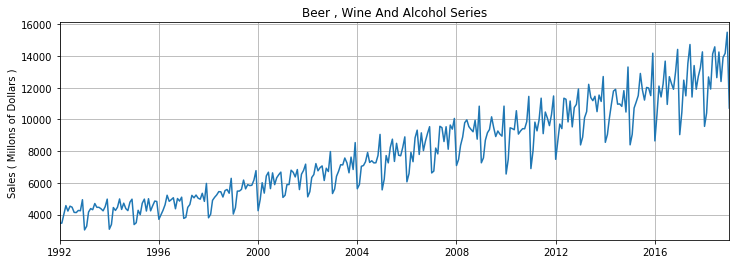

In [ ]:
plt.figure(figsize = (12,4))
plt.title("Beer , Wine And Alcohol Series")
plt.ylabel("Sales ( Millons of Dollars ) ")
plt.grid(True)
plt.autoscale(axis = "x", tight = True)

plt.plot(df.iloc[:,0])
plt.show()

In [ ]:
y = df["S4248SM144NCEN"].values.astype(float)

test_size = 12

train_set = y[:-test_size]
test_set = y[-test_size:]

train_set.shape, test_set.shape

((313,), (12,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (-1,1))

train_norm = scaler.fit_transform(train_set.reshape(-1,1))

train_norm.min(),train_norm.max()

(-1.0, 1.0)

In [ ]:
train_norm.mean(),train_norm.std()

(-0.2041940178388313, 0.4718184233680413)

In [ ]:
type(train_norm),train_norm.shape

(numpy.ndarray, (313, 1))

In [ ]:
train_norm = torch.FloatTensor(train_norm).view(-1)
type(train_norm),train_norm.shape

(torch.Tensor, torch.Size([313]))

In [ ]:
window_size = 12

def input_data(seq, ws):

    out = []
    L = len(seq)

    for i in range(L-ws):

        window = seq[i : i + ws]
        label = seq[i+ws : i+ws+1]

        out.append((window, label))
    
    return out

In [ ]:
train_data = input_data(train_norm, window_size)
len(train_data)

301

In [ ]:
for i,(seq,train) in enumerate(train_data):
    print(seq.shape, train.shape)
    if i ==3:
        break

torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])
torch.Size([12]) torch.Size([1])


In [ ]:
class LSTMnetwork(nn.Module):

    def __init__(self, input_size = 1, hidden_size = 100, output_size = 1):

        super().__init__()
        self.hidden_size = hidden_size

        self.lstm = nn.LSTM(input_size , hidden_size)
        self.linear = nn.Linear(hidden_size , output_size)

        self.hidden = (torch.zeros(1,1,hidden_size),
                       torch.zeros(1,1,hidden_size))
        
    def forward(self,seq):

        lstm_out, self.hidden = self.lstm(seq.view(len(seq),1,-1), self.hidden)

        pred = self.linear(lstm_out.view(len(seq),-1))

        return pred[-1]

In [ ]:
torch.manual_seed(101)
model = LSTMnetwork()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

model

LSTMnetwork(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

In [ ]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]

    for item in params:

        print(f"{item:>6}")
    print(f"__________\n{sum(params):>6}")

count_parameters(model)

   400
 40000
   400
   400
   100
     1
__________
 41301


In [ ]:
import time

epochs = 100
start_time = time.time()

for epoch in range(epochs):

    for seq,y_train in train_data:

        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)

        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    print(f"Epoch : {epoch + 1:2}, Los : {loss.item():10.8f}")

total_time = time.time() - start_time
print(f"\nDuration : {total_time} seconds")

Epoch :  1, Los : 0.25310197
Epoch :  2, Los : 0.37531984
Epoch :  3, Los : 0.39027223
Epoch :  4, Los : 0.34934670
Epoch :  5, Los : 0.33085650
Epoch :  6, Los : 0.33229974
Epoch :  7, Los : 0.32670361
Epoch :  8, Los : 0.32074118
Epoch :  9, Los : 0.30653527
Epoch : 10, Los : 0.29518023
Epoch : 11, Los : 0.26934344
Epoch : 12, Los : 0.25998449
Epoch : 13, Los : 0.24665833
Epoch : 14, Los : 0.22403829
Epoch : 15, Los : 0.18602680
Epoch : 16, Los : 0.18560964
Epoch : 17, Los : 0.17209308
Epoch : 18, Los : 0.25161734
Epoch : 19, Los : 0.22557585
Epoch : 20, Los : 0.17448980
Epoch : 21, Los : 0.20235987
Epoch : 22, Los : 0.20818661
Epoch : 23, Los : 0.16646956
Epoch : 24, Los : 0.17595747
Epoch : 25, Los : 0.11982778
Epoch : 26, Los : 0.09494013
Epoch : 27, Los : 0.04482638
Epoch : 28, Los : 0.07156452
Epoch : 29, Los : 0.00618183
Epoch : 30, Los : 0.10344902
Epoch : 31, Los : 0.00092281
Epoch : 32, Los : 0.01853217
Epoch : 33, Los : 0.00594729
Epoch : 34, Los : 0.01794963
Epoch : 35, Lo

In [ ]:
future = 12

preds = train_norm[-window_size:].tolist()

model.eval()

for i in range(future):

    seq = torch.FloatTensor(preds[-window_size:])

    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        preds.append(model(seq).item())

In [ ]:
preds[window_size:] # preds[-window_size :]

[0.2612956762313843,
 0.6842846870422363,
 0.39159226417541504,
 0.8364370465278625,
 0.9861672520637512,
 0.3965175151824951,
 0.9746654629707336,
 0.4544048309326172,
 0.7777097821235657,
 0.640521764755249,
 0.6270933151245117,
 0.25483715534210205]

In [ ]:
true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1,1))
true_predictions.shape

(12, 1)

In [ ]:
df.iloc[:,0][-12:]

DATE
2018-02-01    10415
2018-03-01    12683
2018-04-01    11919
2018-05-01    14138
2018-06-01    14583
2018-07-01    12640
2018-08-01    14257
2018-09-01    12396
2018-10-01    13914
2018-11-01    14174
2018-12-01    15504
2019-01-01    10718
Name: S4248SM144NCEN, dtype: int64

In [ ]:
x = np.arange("2018-02-01","2019-02-01",dtype = "datetime64[M]").astype("datetime64")
x

array(['2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
       '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01'],
      dtype='datetime64[M]')

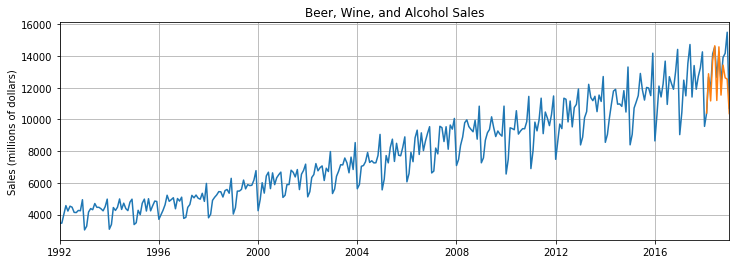

In [ ]:
plt.figure(figsize = (12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis = "x", tight = True)

plt.plot(df.iloc[:,0])
plt.plot(x, true_predictions)
plt.show()

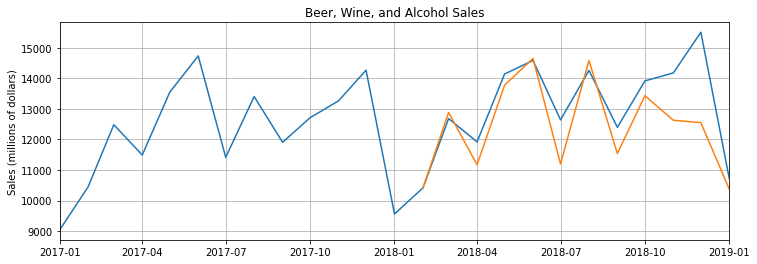

In [ ]:
plt.figure(figsize = (12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis = "x", tight = True)

plt.plot(df.iloc[:,0]["2017-01-01":])
plt.plot(x, true_predictions)
plt.show()

# Forecast Into An UnKnown Future

In [ ]:
epochs = 100
window_size = 12

model.train()

y_norm = scaler.fit_transform(y.reshape(-1,1))
y_norm = torch.FloatTensor(y_norm).view(-1)
all_data = input_data(y_norm, window_size)

import time
start_time = time.time()

for epoch in range(epochs):

    for seq,y_train in all_data:

        optimizer.zero_grad()

        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    print(f"Epoch : {epoch + 1:2}, Loss : {loss.item():10.8f}")

total_time = time.time() - start_time
print(f"\nDuration : {total_time} seconds ...")

Epoch :  1, Loss : 0.02874834
Epoch :  2, Loss : 0.01326633
Epoch :  3, Loss : 0.02101872
Epoch :  4, Loss : 0.01747506
Epoch :  5, Loss : 0.01444324
Epoch :  6, Loss : 0.01360563
Epoch :  7, Loss : 0.01322775
Epoch :  8, Loss : 0.01300842
Epoch :  9, Loss : 0.01264114
Epoch : 10, Loss : 0.01200873
Epoch : 11, Loss : 0.01189025
Epoch : 12, Loss : 0.01123014
Epoch : 13, Loss : 0.01111034
Epoch : 14, Loss : 0.01137467
Epoch : 15, Loss : 0.01201900
Epoch : 16, Loss : 0.01432502
Epoch : 17, Loss : 0.01242777
Epoch : 18, Loss : 0.00900940
Epoch : 19, Loss : 0.00698038
Epoch : 20, Loss : 0.00557621
Epoch : 21, Loss : 0.00877142
Epoch : 22, Loss : 0.00646719
Epoch : 23, Loss : 0.00661006
Epoch : 24, Loss : 0.00340628
Epoch : 25, Loss : 0.00624019
Epoch : 26, Loss : 0.00509826
Epoch : 27, Loss : 0.00376026
Epoch : 28, Loss : 0.00120889
Epoch : 29, Loss : 0.00306584
Epoch : 30, Loss : 0.00033309
Epoch : 31, Loss : 0.00100618
Epoch : 32, Loss : 0.00488637
Epoch : 33, Loss : 0.00029106
Epoch : 34

In [ ]:
window_size = 12
future = 12
L = len(y)

preds = y_norm[-window_size:].tolist()

model.eval()
for i in range(future):
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():

        model.hidden = (torch.zeros(1,1,model.hidden_size),
                       torch.zeros(1,1,model.hidden_size))
        preds.append(model(seq).item())

In [ ]:
df.tail(12)

,S4248SM144NCEN
DATE,
2018-02-01,10415
2018-03-01,12683
2018-04-01,11919
2018-05-01,14138
2018-06-01,14583
2018-07-01,12640
2018-08-01,14257
2018-09-01,12396
2018-10-01,13914


In [ ]:
true_predictions = scaler.inverse_transform(np.array(preds).reshape(-1,1))

x = np.arange("2019-02-01","2020-02-01", dtype = "datetime64[M]").astype("datetime64[D]")
x

array(['2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
       '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01',
       '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01'],
      dtype='datetime64[D]')

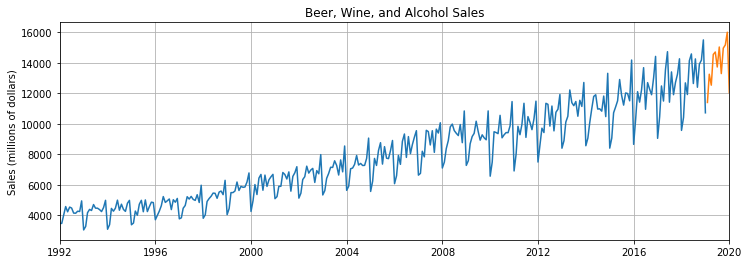

In [ ]:
plt.figure(figsize = (12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

plt.plot(df.iloc[:,0])
plt.plot(x,true_predictions[window_size:])
plt.show()

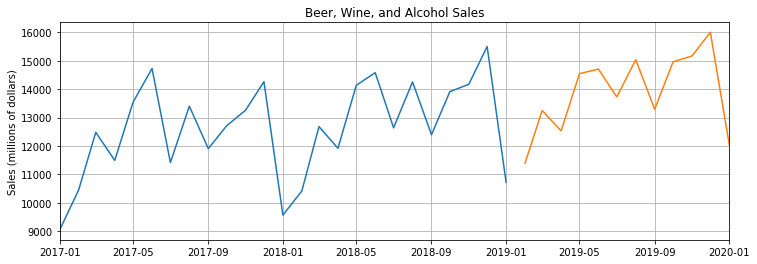

In [ ]:
plt.figure(figsize = (12,4))
plt.title('Beer, Wine, and Alcohol Sales')
plt.ylabel('Sales (millions of dollars)')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

plt.plot(df.iloc[:,0]["2017-01-01":])
plt.plot(x,true_predictions[window_size:])
plt.show()